# Titanic challenge

## Import bibliotek

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import danych przygotwanych w notebooku 'Data Manipulation'

In [2]:
df = pd.read_csv('train_dataframe.csv')
display(df)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Relatives,Pclass_1,Pclass_2,...,AgeG_33-40,AgeG_40-65,AgeG_above_65,AgeG_below_11,FareG_100-300,FareG_14.454-31,FareG_31-100,FareG_7.91-14.454,FareG_above 300,FareG_below_7.91
0,1,0.0,0,22.0,1,0,7.2500,1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,1,38.0,1,0,71.2833,1,True,False,...,True,False,False,False,False,False,True,False,False,False
2,3,1.0,1,26.0,0,0,7.9250,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,1.0,1,35.0,1,0,53.1000,1,True,False,...,True,False,False,False,False,False,True,False,False,False
4,5,0.0,0,35.0,0,0,8.0500,0,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,0,27.0,0,0,13.0000,0,False,True,...,False,False,False,False,False,False,False,True,False,False
887,888,1.0,1,19.0,0,0,30.0000,0,True,False,...,False,False,False,False,False,True,False,False,False,False
888,889,0.0,1,24.0,1,2,23.4500,3,False,False,...,False,False,False,False,False,True,False,False,False,False
889,890,1.0,0,26.0,0,0,30.0000,0,True,False,...,False,False,False,False,False,True,False,False,False,False


## Import bibliotek 2

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
features = list(df.columns)
features.remove('PassengerId')
features.remove('Survived')

features_clear = [f for f in features 
                 if 'Pclass' not in f 
                 and 'Title' not in f 
                 and 'Cabin' not in f 
                 and 'Embarked' not in f 
                 and 'Relatives' not in f 
                 and 'AgeG' not in f 
                 and 'FareG' not in f]

features_pclass = [f for f in features if 'Pclass' in f]
features_pclass = features_clear + features_pclass

features_title = [f for f in features if 'Title' in f]
features_title = features_clear + features_title

features_cabin = [f for f in features if 'Cabin' in f]
features_cabin = features_clear + features_cabin

features_embarked = [f for f in features if 'Embarked' in f]
features_embarked = features_clear + features_embarked

features_relatives = [f for f in features if 'Relatives' in f]
features_relatives = features_clear + features_relatives

features_age_g = [f for f in features if 'AgeG' in f]
features_age_g = features_clear + features_age_g

features_fare_g = [f for f in features if 'FareG' in f]
features_fare_g = features_clear + features_fare_g

features_list = [features_clear, features_pclass, features_title, features_cabin, features_embarked, features_relatives, features_age_g, features_fare_g]
for l in features_list:
    print(l)

['Sex', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Army', 'Title_Clerisy', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Nobility']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Relatives']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'AgeG_11-18', 'AgeG_18-22', 'AgeG_22-26', 'AgeG_26-33', 'AgeG_33-40', 'AgeG_40-65', 'AgeG_above_65', 'AgeG_below_11']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FareG_100-300', 'FareG_14.454-31', 'FareG_31-100', 'FareG_7.91-14.454', 'FareG_above 300', 'FareG_below_7.91']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Survived'], test_size=0.2, random_state=42)
scaler = MinMaxScaler()
classifier = KNeighborsClassifier(n_neighbors=5)

In [13]:
kNeighborsClassifier = KNeighborsClassifier(n_neighbors=5)
sVC = SVC(
    kernel="linear",
    C=0.025,
    random_state=42
)
gaussianProcessClassifier = GaussianProcessClassifier(
    1.0 * RBF(1.0),
    random_state=42
)
decisionTreeClassifier = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
randomForestClassifier = RandomForestClassifier(
    max_depth=5, 
    n_estimators=10, 
    max_features=1, 
    random_state=42
)
mLPClassifier = MLPClassifier(
    alpha=1, 
    max_iter=712, 
    random_state=42
)
adaBoostClassifier = AdaBoostClassifier(
    algorithm="SAMME", 
    random_state=42
)
gaussianNB = GaussianNB()
quadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis()

classifiers = [
    kNeighborsClassifier,
    sVC,
    gaussianProcessClassifier,
    decisionTreeClassifier,
    randomForestClassifier,
    mLPClassifier,
    adaBoostClassifier,
    gaussianNB,
    quadraticDiscriminantAnalysis
]

maxAbsScaler = MaxAbsScaler()
minMaxScaler = MinMaxScaler()
normalizer = Normalizer()
powerTransformer = PowerTransformer()
quantileTransformer = QuantileTransformer()
robustScaler = RobustScaler()
standardScaler = StandardScaler()

scalers = [maxAbsScaler, minMaxScaler, normalizer, powerTransformer, quantileTransformer, robustScaler, standardScaler]
score_dfs = []
for fea in features_list:
    X_train, X_test, y_train, y_test = train_test_split(df[fea], df['Survived'], test_size=0.2, random_state=42)
    score_df = pd.DataFrame()
    scaler_names = []
    for s in scalers:
        scaler_name = [name for name, value in globals().items() if value is s]
        scaler_names.append(scaler_name[0])
        
    for cl in classifiers:
        classifier_name = [name for name, value in globals().items() if value is cl]
        #print("\n", classifier_name[0], ":")
        classifier_score_list = []
        for s in scalers:
            s.fit(X_train)
            train_data = s.transform(X_train)
            cl.fit(train_data, y_train)
            
            test_data = s.transform(X_test)
            scaler_name = [name for name, value in globals().items() if value is s]
            accuracy = cl.score(test_data, y_test)
            #print(scaler_name[0], ": Accuracy:", accuracy)
            classifier_score_list.append(accuracy)
        
        score_df[classifier_name[0]] = classifier_score_list
        
    score_df.index = scaler_names
    
    display(score_df)
    score_dfs.append(score_df)

,kNeighborsClassifier,sVC,gaussianProcessClassifier,decisionTreeClassifier,randomForestClassifier,mLPClassifier,adaBoostClassifier,gaussianNB,quadraticDiscriminantAnalysis
maxAbsScaler,0.765363,0.782123,0.798883,0.810056,0.787709,0.782123,0.793296,0.787709,0.793296
minMaxScaler,0.765363,0.782123,0.798883,0.810056,0.787709,0.782123,0.793296,0.787709,0.793296
normalizer,0.793296,0.586592,0.821229,0.787709,0.821229,0.681564,0.798883,0.765363,0.765363
powerTransformer,0.765363,0.782123,0.798883,0.810056,0.787709,0.787709,0.793296,0.770950,0.787709
quantileTransformer,0.782123,0.782123,0.782123,0.810056,0.787709,0.782123,0.793296,0.754190,0.793296
robustScaler,0.782123,0.782123,0.810056,0.810056,0.787709,0.787709,0.793296,0.787709,0.793296
standardScaler,0.765363,0.782123,0.798883,0.810056,0.787709,0.798883,0.793296,0.787709,0.793296


,kNeighborsClassifier,sVC,gaussianProcessClassifier,decisionTreeClassifier,randomForestClassifier,mLPClassifier,adaBoostClassifier,gaussianNB,quadraticDiscriminantAnalysis
maxAbsScaler,0.787709,0.782123,0.821229,0.804469,0.793296,0.815642,0.804469,0.782123,0.804469
minMaxScaler,0.787709,0.782123,0.821229,0.804469,0.793296,0.815642,0.804469,0.782123,0.804469
normalizer,0.776536,0.586592,0.815642,0.804469,0.776536,0.687151,0.798883,0.810056,0.821229
powerTransformer,0.810056,0.782123,0.826816,0.804469,0.793296,0.810056,0.804469,0.737430,0.787709
quantileTransformer,0.776536,0.782123,0.815642,0.804469,0.793296,0.798883,0.804469,0.731844,0.787709
robustScaler,0.804469,0.782123,0.821229,0.804469,0.787709,0.798883,0.804469,0.782123,0.798883
standardScaler,0.793296,0.782123,0.832402,0.804469,0.787709,0.826816,0.804469,0.782123,0.837989


,kNeighborsClassifier,sVC,gaussianProcessClassifier,decisionTreeClassifier,randomForestClassifier,mLPClassifier,adaBoostClassifier,gaussianNB,quadraticDiscriminantAnalysis
maxAbsScaler,0.759777,0.782123,0.804469,0.826816,0.804469,0.821229,0.804469,0.636872,0.586592
minMaxScaler,0.759777,0.782123,0.804469,0.826816,0.804469,0.815642,0.804469,0.636872,0.586592
normalizer,0.776536,0.586592,0.798883,0.782123,0.793296,0.681564,0.798883,0.659218,0.586592
powerTransformer,0.765363,0.787709,0.770950,0.826816,0.804469,0.793296,0.804469,0.631285,0.787709
quantileTransformer,0.798883,0.782123,0.798883,0.826816,0.804469,0.793296,0.804469,0.631285,0.586592
robustScaler,0.776536,0.798883,0.804469,0.826816,0.804469,0.815642,0.804469,0.648045,0.586592
standardScaler,0.754190,0.810056,0.798883,0.826816,0.804469,0.810056,0.804469,0.636872,0.681564


,kNeighborsClassifier,sVC,gaussianProcessClassifier,decisionTreeClassifier,randomForestClassifier,mLPClassifier,adaBoostClassifier,gaussianNB,quadraticDiscriminantAnalysis
maxAbsScaler,0.759777,0.782123,0.804469,0.804469,0.748603,0.782123,0.793296,0.430168,0.413408
minMaxScaler,0.754190,0.782123,0.804469,0.804469,0.748603,0.782123,0.793296,0.430168,0.586592
normalizer,0.770950,0.586592,0.798883,0.793296,0.743017,0.681564,0.798883,0.737430,0.413408
powerTransformer,0.765363,0.782123,0.798883,0.804469,0.743017,0.787709,0.793296,0.407821,0.407821
quantileTransformer,0.776536,0.782123,0.804469,0.804469,0.748603,0.787709,0.793296,0.407821,0.413408
robustScaler,0.782123,0.782123,0.821229,0.804469,0.748603,0.810056,0.793296,0.446927,0.413408
standardScaler,0.759777,0.782123,0.793296,0.804469,0.748603,0.810056,0.793296,0.413408,0.413408


,kNeighborsClassifier,sVC,gaussianProcessClassifier,decisionTreeClassifier,randomForestClassifier,mLPClassifier,adaBoostClassifier,gaussianNB,quadraticDiscriminantAnalysis
maxAbsScaler,0.782123,0.782123,0.776536,0.810056,0.770950,0.782123,0.787709,0.748603,0.776536
minMaxScaler,0.782123,0.782123,0.776536,0.810056,0.765363,0.782123,0.787709,0.748603,0.765363
normalizer,0.793296,0.586592,0.810056,0.782123,0.810056,0.681564,0.810056,0.743017,0.810056
powerTransformer,0.782123,0.782123,0.804469,0.810056,0.770950,0.798883,0.787709,0.770950,0.765363
quantileTransformer,0.782123,0.782123,0.804469,0.810056,0.765363,0.776536,0.787709,0.765363,0.793296
robustScaler,0.787709,0.782123,0.804469,0.810056,0.765363,0.793296,0.787709,0.748603,0.782123
standardScaler,0.787709,0.782123,0.798883,0.810056,0.765363,0.793296,0.787709,0.748603,0.765363


,kNeighborsClassifier,sVC,gaussianProcessClassifier,decisionTreeClassifier,randomForestClassifier,mLPClassifier,adaBoostClassifier,gaussianNB,quadraticDiscriminantAnalysis
maxAbsScaler,0.765363,0.782123,0.810056,0.821229,0.759777,0.787709,0.787709,0.793296,0.793296
minMaxScaler,0.765363,0.782123,0.810056,0.821229,0.759777,0.787709,0.787709,0.793296,0.793296
normalizer,0.776536,0.586592,0.821229,0.765363,0.759777,0.675978,0.793296,0.765363,0.553073
powerTransformer,0.770950,0.782123,0.798883,0.821229,0.759777,0.793296,0.787709,0.754190,0.782123
quantileTransformer,0.782123,0.782123,0.787709,0.821229,0.759777,0.776536,0.787709,0.754190,0.787709
robustScaler,0.787709,0.782123,0.810056,0.821229,0.759777,0.804469,0.787709,0.793296,0.804469
standardScaler,0.765363,0.782123,0.804469,0.821229,0.759777,0.804469,0.787709,0.793296,0.648045


,kNeighborsClassifier,sVC,gaussianProcessClassifier,decisionTreeClassifier,randomForestClassifier,mLPClassifier,adaBoostClassifier,gaussianNB,quadraticDiscriminantAnalysis
maxAbsScaler,0.787709,0.782123,0.798883,0.810056,0.776536,0.793296,0.798883,0.77095,0.798883
minMaxScaler,0.787709,0.782123,0.798883,0.810056,0.776536,0.793296,0.798883,0.77095,0.754190
normalizer,0.743017,0.586592,0.810056,0.776536,0.743017,0.681564,0.798883,0.72067,0.743017
powerTransformer,0.810056,0.782123,0.804469,0.810056,0.770950,0.782123,0.798883,0.73743,0.770950
quantileTransformer,0.810056,0.782123,0.798883,0.810056,0.776536,0.787709,0.798883,0.73743,0.709497
robustScaler,0.804469,0.782123,0.804469,0.810056,0.776536,0.793296,0.798883,0.77095,0.653631
standardScaler,0.793296,0.782123,0.804469,0.810056,0.776536,0.804469,0.798883,0.77095,0.793296


,kNeighborsClassifier,sVC,gaussianProcessClassifier,decisionTreeClassifier,randomForestClassifier,mLPClassifier,adaBoostClassifier,gaussianNB,quadraticDiscriminantAnalysis
maxAbsScaler,0.787709,0.782123,0.798883,0.821229,0.759777,0.782123,0.793296,0.614525,0.586592
minMaxScaler,0.787709,0.782123,0.798883,0.821229,0.759777,0.782123,0.793296,0.614525,0.586592
normalizer,0.765363,0.586592,0.804469,0.776536,0.798883,0.681564,0.787709,0.659218,0.586592
powerTransformer,0.776536,0.782123,0.782123,0.821229,0.748603,0.770950,0.793296,0.614525,0.586592
quantileTransformer,0.770950,0.782123,0.787709,0.821229,0.748603,0.782123,0.793296,0.614525,0.586592
robustScaler,0.776536,0.782123,0.804469,0.821229,0.765363,0.787709,0.793296,0.614525,0.586592
standardScaler,0.776536,0.782123,0.804469,0.821229,0.759777,0.787709,0.793296,0.614525,0.586592


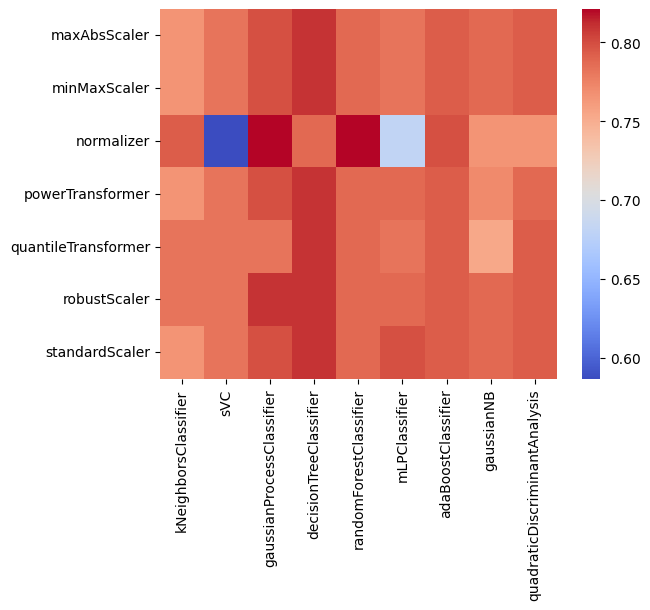

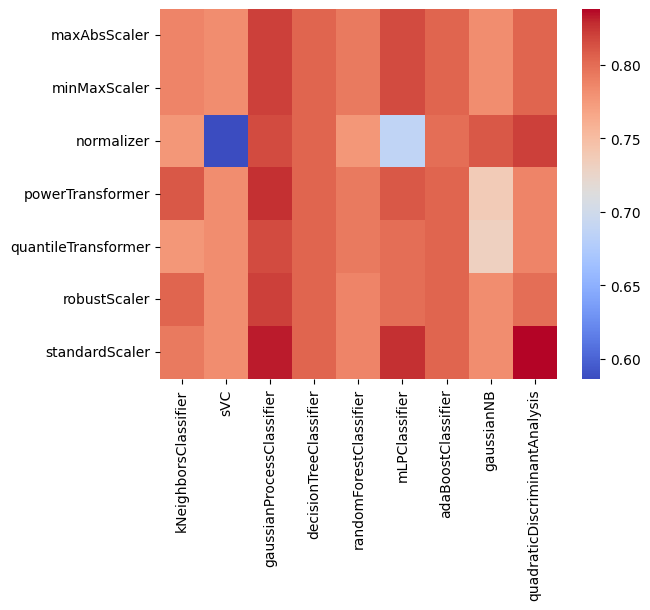

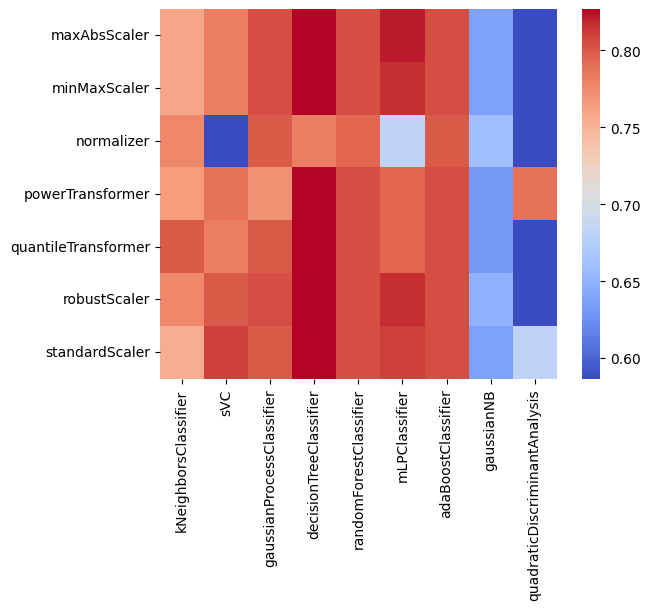

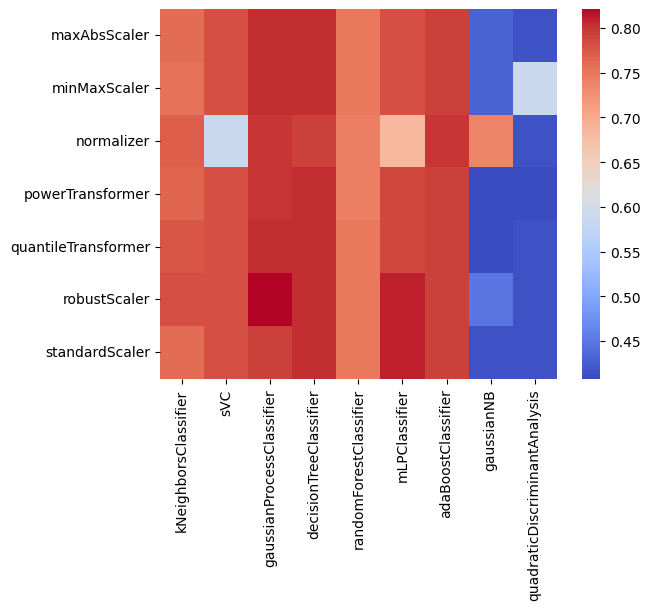

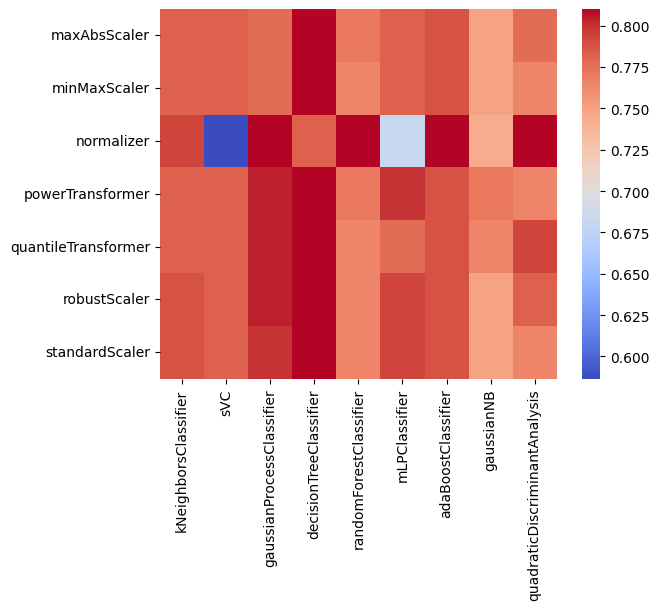

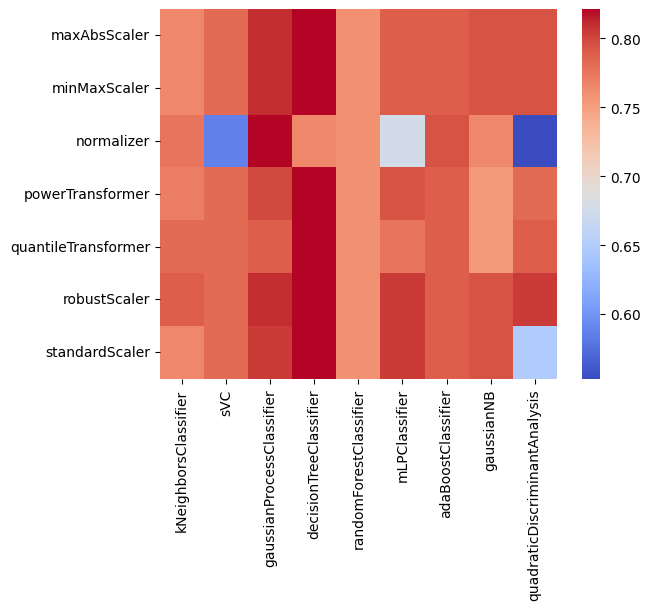

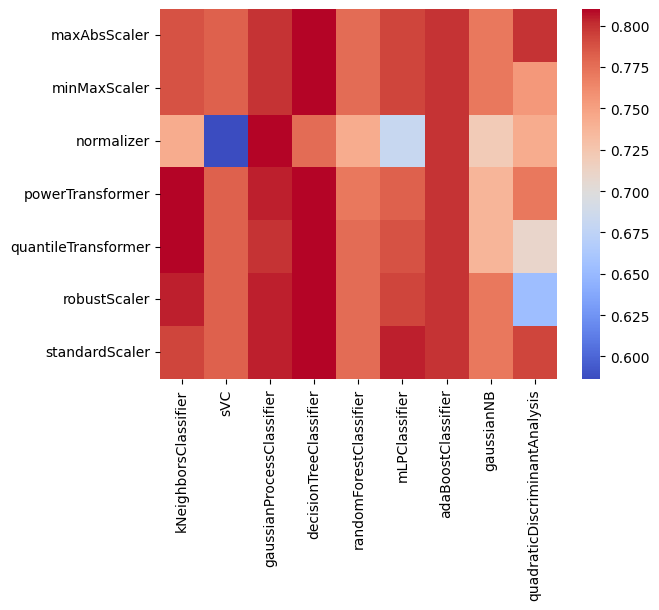

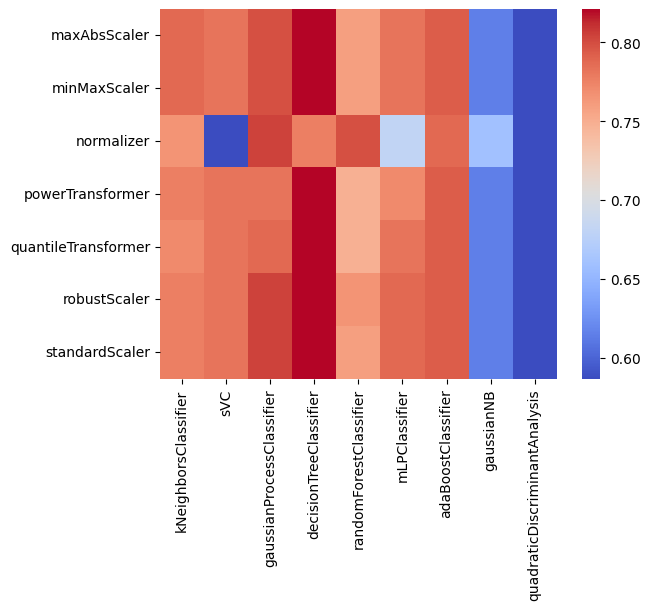

In [17]:
for score_df in score_dfs:
    heatmap = sns.heatmap(score_df, cmap="coolwarm")
    plt.show()

In [77]:
#[features_clear, features_pclass, features_title, features_cabin, features_embarked, features_relatives, features_age_g, features_fare_g]
best_features_for_tree = [f for f in features 
                         if 'Pclass' not in f ]
best_features_for_tree.remove('Age')
best_features_for_tree.remove('Fare')
best_features_for_tree.remove('SibSp')
best_features_for_tree.remove('Parch')
X_train, X_test, y_train, y_test = train_test_split(df[best_features_for_tree], df['Survived'], test_size=0.2, random_state=42)

In [78]:
for s in scalers:
    s.fit(X_train)
    train_data = s.transform(X_train)
    decisionTreeClassifier.fit(train_data, y_train)
    test_data = s.transform(X_test)
    accuracy = decisionTreeClassifier.score(test_data, y_test)
    scaler_name = [name for name, value in globals().items() if value is s]
    print(scaler_name[0], ": Accuracy:", accuracy)

maxAbsScaler : Accuracy: 0.8268156424581006
minMaxScaler : Accuracy: 0.8268156424581006
normalizer : Accuracy: 0.8324022346368715
powerTransformer : Accuracy: 0.8268156424581006
quantileTransformer : Accuracy: 0.8268156424581006
robustScaler : Accuracy: 0.8268156424581006
standardScaler : Accuracy: 0.8268156424581006
